Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, было интересно ее проверять.
- Я оставил некоторые советы надеюсь они будут полезными или интересными.

- Техника бутстрап применилась корректно, было проведено тщательное исследование и выбран правильный регион!
- Отправляю проект назад, чтобы у тебя была возможность задать вопросы, если они у тебя есть. Если их нет, то можешь просто отправить проект еще раз и я его зачту


# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from math import sqrt
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>

In [2]:
RANDOM_STATE = RandomState(42)

SEARCH_WELLS = 500 # Количество изучаемых скважин
DEVELOP_WELLS = 200 # Количество разрабатываемых скважин
PRICE = 450 # Цена одного барреля нефти
UNIT = 1000 # Количество баррелей в одном юните в датасете
BUDGET = 10**10 # Бюджет на разработку скважин в регионе
PRICE_FOR_UNIT = PRICE * UNIT # Цена за одну единицу объема, указанную в датасете


<div class="alert alert-block alert-success">
<b>Успех:</b> Лайк за константы в верхнем регистре, не забываешь про PEP8
</div> 


In [3]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
df_1.info()
df_1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [5]:
df_2.info()
df_2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [6]:
df_3.info()
df_3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532



<div class="alert alert-block alert-info">
<b>Совет: </b> Анализ данных и выводы понятнее было бы наблюдать в данном разделе
</div>


## Обучение и проверка модели

### Модель для региона №1

Изучим зависимости признаков

array([[<AxesSubplot:xlabel='f0', ylabel='f0'>,
        <AxesSubplot:xlabel='f1', ylabel='f0'>,
        <AxesSubplot:xlabel='f2', ylabel='f0'>,
        <AxesSubplot:xlabel='product', ylabel='f0'>],
       [<AxesSubplot:xlabel='f0', ylabel='f1'>,
        <AxesSubplot:xlabel='f1', ylabel='f1'>,
        <AxesSubplot:xlabel='f2', ylabel='f1'>,
        <AxesSubplot:xlabel='product', ylabel='f1'>],
       [<AxesSubplot:xlabel='f0', ylabel='f2'>,
        <AxesSubplot:xlabel='f1', ylabel='f2'>,
        <AxesSubplot:xlabel='f2', ylabel='f2'>,
        <AxesSubplot:xlabel='product', ylabel='f2'>],
       [<AxesSubplot:xlabel='f0', ylabel='product'>,
        <AxesSubplot:xlabel='f1', ylabel='product'>,
        <AxesSubplot:xlabel='f2', ylabel='product'>,
        <AxesSubplot:xlabel='product', ylabel='product'>]], dtype=object)

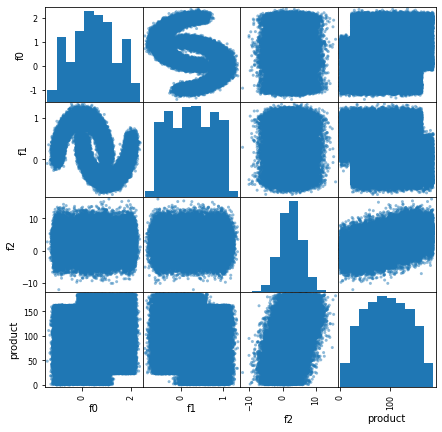

In [7]:
pd.plotting.scatter_matrix(df_1, figsize=(7, 7)) 

Из диаграмм видно, что признаки f0 и f1 имею сложную нелинейную зависимость. Остальные признаки не коррелируют между собой. Целевой признак имеет корреляцию только с признаком f2

In [8]:
features_1 = df_1.drop(['id', 'product'], axis=1)
target_1 = df_1['product']

Выдели обучающую и валидационную выборки 

In [9]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=.25, random_state=RANDOM_STATE
)

In [10]:
print(f'Размер обучающей выборки - {len(features_train_1)}')
print(f'Размер валидационной выборки - {len(features_valid_1)}')

Размер обучающей выборки - 75000
Размер валидационной выборки - 25000


Выполним стандартизацию количественных признаков

In [11]:
scaler = StandardScaler()
scaler.fit(features_train_1)
features_train_1 = pd.DataFrame(
    scaler.transform(features_train_1), index=features_train_1.index, columns=features_train_1.columns)
features_valid_1 = pd.DataFrame(
    scaler.transform(features_valid_1), index=features_valid_1.index, columns=features_valid_1.columns)

<div class="alert alert-block alert-success">
<b>Успех:</b> Масштабирование проведено корректно
</div

In [12]:
model_1 = LinearRegression().fit(features_train_1, target_train_1)
predicted_1 = pd.Series(model_1.predict(features_valid_1), index=target_valid_1.index)
rmse_1 = sqrt(mean_squared_error(target_valid_1, predicted_1))
print(f'Средний запас предсказанного сырья: {predicted_1.sum() / predicted_1.shape[0]:.3f} тысяч баррелей')
print(f'RMSE = {rmse_1:.2f}')

Средний запас предсказанного сырья: 92.399 тысяч баррелей
RMSE = 37.76


In [13]:
print('Коэффициенты модели:', model_1.coef_)

Коэффициенты модели: [ 3.34267636 -7.18196275 21.4239503 ]


**Вывод:** в результате обучения получили модель, которая на валидационной выборке имеет ошибку `RMSE = 37.76`, что является не очень хорошим результатом при среднем значении предсказанного объема равному `92.4`. Также по коэффициентам модели видно, что наибольший вклад в результат вносит именно признак f2. Что согласуется с тем, что мы увидели при изучении зависимостей признаков

### Модель для региона №2

Изучим зависимости признаков

array([[<AxesSubplot:xlabel='f0', ylabel='f0'>,
        <AxesSubplot:xlabel='f1', ylabel='f0'>,
        <AxesSubplot:xlabel='f2', ylabel='f0'>,
        <AxesSubplot:xlabel='product', ylabel='f0'>],
       [<AxesSubplot:xlabel='f0', ylabel='f1'>,
        <AxesSubplot:xlabel='f1', ylabel='f1'>,
        <AxesSubplot:xlabel='f2', ylabel='f1'>,
        <AxesSubplot:xlabel='product', ylabel='f1'>],
       [<AxesSubplot:xlabel='f0', ylabel='f2'>,
        <AxesSubplot:xlabel='f1', ylabel='f2'>,
        <AxesSubplot:xlabel='f2', ylabel='f2'>,
        <AxesSubplot:xlabel='product', ylabel='f2'>],
       [<AxesSubplot:xlabel='f0', ylabel='product'>,
        <AxesSubplot:xlabel='f1', ylabel='product'>,
        <AxesSubplot:xlabel='f2', ylabel='product'>,
        <AxesSubplot:xlabel='product', ylabel='product'>]], dtype=object)

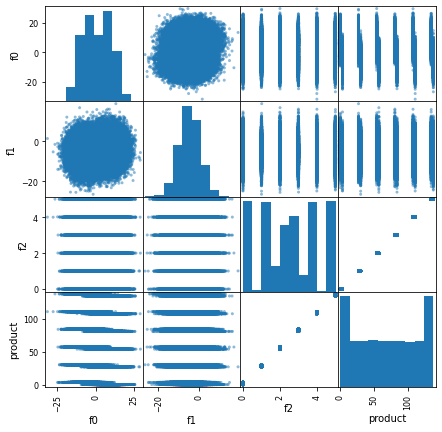

In [14]:
pd.plotting.scatter_matrix(df_2, figsize=(7, 7)) 

Из диаграмм видно, что признаки не коррелируют между собой. Целевой признак имеет сильную корреляцию только с признаком f2

In [15]:
features_2 = df_2.drop(['id', 'product'], axis=1)
target_2 = df_2['product']

Выдели обучающую и валидационную выборки 

In [16]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=.25, random_state=RANDOM_STATE
)

In [17]:
print(f'Размер обучающей выборки - {len(features_train_2)}')
print(f'Размер валидационной выборки - {len(features_valid_2)}')

Размер обучающей выборки - 75000
Размер валидационной выборки - 25000


Выполним стандартизацию количественных признаков

In [18]:
scaler = StandardScaler()
scaler.fit(features_train_2)
features_train_2 = pd.DataFrame(
    scaler.transform(features_train_2), index=features_train_2.index, columns=features_train_2.columns)
features_valid_2 = pd.DataFrame(
    scaler.transform(features_valid_2), index=features_valid_2.index, columns=features_valid_2.columns)

In [19]:
model_2 = LinearRegression().fit(features_train_2, target_train_2)
predicted_2 = pd.Series(model_2.predict(features_valid_2), index=target_valid_2.index)
rmse_2 = sqrt(mean_squared_error(target_valid_2, predicted_2))
print(f'Средний запас предсказанного сырья: {predicted_2.sum() / predicted_2.shape[0]:.3f} тысяч баррелей')
print(f'RMSE = {rmse_2:.2f}')

Средний запас предсказанного сырья: 68.588 тысяч баррелей
RMSE = 0.89


In [20]:
print('Коэффициенты модели:', model_2.coef_)

Коэффициенты модели: [-1.29905268 -0.10943252 45.9149147 ]


**Вывод:** в результате обучения получили модель, которая на валидационной выборке имеет ошибку `RMSE = 0.89`, что является хорошим результатом при среднем значении предсказанного объема равному `68.6`. Также по коэффициентам модели видно, что наибольший вклад в результат вносит именно признак f2. Что согласуется с тем, что мы увидели при изучении зависимостей признаков

### Модель для региона №3

Изучим зависимости признаков

array([[<AxesSubplot:xlabel='f0', ylabel='f0'>,
        <AxesSubplot:xlabel='f1', ylabel='f0'>,
        <AxesSubplot:xlabel='f2', ylabel='f0'>,
        <AxesSubplot:xlabel='product', ylabel='f0'>],
       [<AxesSubplot:xlabel='f0', ylabel='f1'>,
        <AxesSubplot:xlabel='f1', ylabel='f1'>,
        <AxesSubplot:xlabel='f2', ylabel='f1'>,
        <AxesSubplot:xlabel='product', ylabel='f1'>],
       [<AxesSubplot:xlabel='f0', ylabel='f2'>,
        <AxesSubplot:xlabel='f1', ylabel='f2'>,
        <AxesSubplot:xlabel='f2', ylabel='f2'>,
        <AxesSubplot:xlabel='product', ylabel='f2'>],
       [<AxesSubplot:xlabel='f0', ylabel='product'>,
        <AxesSubplot:xlabel='f1', ylabel='product'>,
        <AxesSubplot:xlabel='f2', ylabel='product'>,
        <AxesSubplot:xlabel='product', ylabel='product'>]], dtype=object)

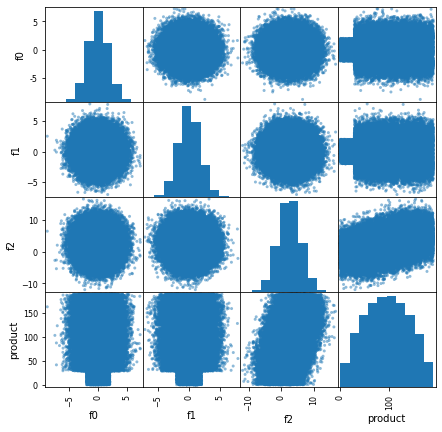

In [21]:
pd.plotting.scatter_matrix(df_3, figsize=(7, 7)) 

Из диаграмм видно, что признаки не коррелируют между собой. Целевой признак имеет слабую корреляцию с признаком f2 и никак не коррелирую с признаками f0 и f1

In [22]:
features_3 = df_3.drop(['id', 'product', 'f0', 'f1'], axis=1)
target_3 = df_3['product']

Выдели обучающую и валидационную выборки 

In [23]:
features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
    features_3, target_3, test_size=.25, random_state=RANDOM_STATE
)

In [24]:
print(f'Размер обучающей выборки - {len(features_train_3)}')
print(f'Размер валидационной выборки - {len(features_valid_3)}')

Размер обучающей выборки - 75000
Размер валидационной выборки - 25000


Выполним стандартизацию количественных признаков

In [25]:
scaler = StandardScaler()
scaler.fit(features_train_3)
features_train_3 = pd.DataFrame(
    scaler.transform(features_train_3), index=features_train_3.index, columns=features_train_3.columns)
features_valid_3 = pd.DataFrame(
    scaler.transform(features_valid_3), index=features_valid_3.index, columns=features_valid_3.columns)

In [26]:
model_3 = LinearRegression().fit(features_train_3, target_train_3)
predicted_3 = pd.Series(model_3.predict(features_valid_3), index=target_valid_3.index)
rmse_3 = sqrt(mean_squared_error(target_valid_3, predicted_3))
print(f'Средний запас предсказанного сырья: {predicted_3.sum() / predicted_3.shape[0]:.3f} тысяч баррелей')
print(f'RMSE = {rmse_3:.2f}')

Средний запас предсказанного сырья: 95.095 тысяч баррелей
RMSE = 40.24


In [27]:
print('Коэффициенты модели:', model_3.coef_)

Коэффициенты модели: [20.02863023]


**Вывод:** в результате обучения получили модель, которая на валидационной выборке имеет ошибку `RMSE = 40.24`, что является не очень хорошим результатом при среднем значении предсказанного объема равному `95.1`. Также по коэффициентам модели видно, что наибольший вклад в результат вносит именно признак f2. Что согласуется с тем, что мы увидели при изучении зависимостей признаков

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан хорошо, все метрики посчитаны корректно
</div> 


<div class="alert alert-block alert-info">
<b>Совет: </b>  Можно было бы использовать циклы/функции и избежать дублирования кода. Дублирование кода, часто приводит к глупым ошибкам, которые тяжело отследить.
</div>

**Вывод по пункту**: было обучено 3 модели для разных регионов. Наилучний результат показала модель для 2 региона: `RMSE = 0.89` при среднем запасе предсказанного сырья в `68.6` единиц. Модели для регионов 1 и 3 имеют значительно больший средний предсказанный объем сырья: 92.4 и 95.1 соответственно. Однако модели имеют большую ошибку: `RMSE` моделей равен `37.76` и `40.24` соответственно.  
Также стоит заметить, что у всех моделей наибольший вес имеет именно признак f2. По диаграмма зависимостей признаков также видно, что целевой признак имеет корреляцию только с признаком f2 и никак не коррелируют с признаками f0 и f1, что является достаточно важным моментом для линейной модели. Стоит задуматься над тем, чтобы исключить f0 и f1 из признаков и либо добавить другие(более подходящии), либо оставить только признак f2.


<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям.  

Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
</div>


## Подготовка к расчёту прибыли

In [28]:
production_volume_per_well = BUDGET / DEVELOP_WELLS / PRICE_FOR_UNIT
print(f'Для безубыточного производства на каждой скважине необходимо добывать {production_volume_per_well:.3f} тысяч баррелей')

Для безубыточного производства на каждой скважине необходимо добывать 111.111 тысяч баррелей


**Вывод:** расчеты говорят о том, что для окупаимости региона на каждой разрабатываемой скважине необходимо добавать не меньше 111.111 тысяч баррелей. По предсказаниям всех обученных моделей средние запасы всех трех регионов меньше необходимого количества. Поэтому рискованно брать рандомную скважину. Безопаснее по предсказаниям модели определять 200 наиболее перспективных скважин


<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>

## Расчёт прибыли и рисков 

In [29]:
def get_revenue(target, predicted, develop_wells, price) -> float:
    predict_sorted = predicted.sort_values(ascending=False)
    best_wells = target[predict_sorted.index][:develop_wells]
    return best_wells.sum() * price

In [30]:
def get_profit(target, predicted, develop_wells, price, expenses) -> float:
    revenue = get_revenue(target, predicted, develop_wells, price)
    return revenue - expenses

<div class="alert alert-block alert-success"
<b>Успех:</b> Ф-ция для подсчета прибыли и выручки определены верно
</div>


In [31]:
def bootstrap_profit(target, predicted, count, search_wells, develop_wells, price, expenses) -> pd.Series:
    profits = []
    for i in range(count):
        target_subsamples = target.sample(n=search_wells, replace=True, random_state=RANDOM_STATE)
        predicted_subsamples = predicted[target_subsamples.index]
        profit = get_profit(
            target_subsamples, predicted_subsamples, develop_wells, price, expenses
        )
        profits.append(profit)
    return pd.Series(profits)

<div class="alert alert-block alert-success">
<b>Успех:</b> С бутстрапом тоже все в порядке, метрики
</div>

### Регион №1

In [32]:
profits = bootstrap_profit(
    target_valid_1, predicted_1, 1000, SEARCH_WELLS, DEVELOP_WELLS, PRICE_FOR_UNIT, BUDGET
)
lower = profits.quantile(.025)
upper = profits.quantile(.975)
loss = profits[profits < 0].count() / profits.shape[0]
print(f'Средняя прибыль: {profits.mean():.2f}')
print(f'95% доверительный интервал: [{lower:.2f}, {upper:.2f}]')
print(f'Риск получить убыток: {loss:.2%}', )

Средняя прибыль: 440446619.54
95% доверительный интервал: [-129698263.88, 980351534.78]
Риск получить убыток: 5.80%


<div class="alert alert-block alert-success">
<b>Успех:</b>  Все метрики считаются верным образом!  Но почему бы не занести эти действия  в функцию? 
</div>

### Регион №2

In [33]:
profits = bootstrap_profit(
    target_valid_2, predicted_2, 1000, SEARCH_WELLS, DEVELOP_WELLS, PRICE_FOR_UNIT, BUDGET
)
lower = profits.quantile(.025)
upper = profits.quantile(.975)
loss = profits[profits < 0].count() / profits.shape[0]
print(f'Средняя прибыль: {profits.mean():.2f}')
print(f'95% доверительный интервал: [{lower:.2f}, {upper:.2f}]')
print(f'Риск получить убыток: {loss:.2%}', )

Средняя прибыль: 489036146.09
95% доверительный интервал: [63878578.77, 900130455.53]
Риск получить убыток: 1.00%


### Регион №3

In [34]:
profits = bootstrap_profit(
    target_valid_3, predicted_3, 1000, SEARCH_WELLS, DEVELOP_WELLS, PRICE_FOR_UNIT, BUDGET
)
lower = profits.quantile(.025)
upper = profits.quantile(.975)
loss = profits[profits < 0].count() / profits.shape[0]
print(f'Средняя прибыль: {profits.mean():.2f}')
print(f'95% доверительный интервал: [{lower:.2f}, {upper:.2f}]')
print(f'Риск получить убыток: {loss:.2%}', )

Средняя прибыль: 344295892.34
95% доверительный интервал: [-215964219.94, 880027938.14]
Риск получить убыток: 11.40%


**Вывод:** Для каждого региона была применена техника Bootstrap на 1000 выборках. Каждая выборка содержит 500 скважин для которых проводятся исследования. Из этих 500 выбираются 200, у которых модель предсказала наибольший объем запасов. В итоге были получены следующие результаты:  
1. Регион №1. Средняя прибыль составила `440446619.54`. 95% доверительный интервал для прибыли: `[-129698263.88, 980351534.78]`. Нижняя граница говорит о том, что мы имеем вероятность 2,5% получить убыток в `129698263.88` или более. Риск получить убыток составляет 5.8%  
2. Регион №2. Средняя прибыль составила `489036146.09`. 95% доверительный интервал для прибыли: `[63878578.77, 900130455.53]`. Нижняя граница говорит о том, что с вероятностью в 97.5% мы получим прибыль не менее `63878578.77`. Риск получить убыток составляет 1%  
3. Регион №3. Средняя прибыль составила `344295892.34`. 95% доверительный интервал для прибыли: `[-215964219.94, 880027938.14]`. Нижняя граница говорит о том, что мы имеем вероятность 2,5% получить убыток в `215964219.94` или более. Риск получить убыток составляет 11.4%  
  
В результате регионы 1 и 3 имеют слишком высокий риск получить убыток. Также стоит заметить, что вероятная прибыль во втором регионе наибольшая:  
* средняя прибыль `489036146.09`  
* с вероятностью 97.5% прибыль будет не менее `63878578.77`  
* с вероятность. 2.5% прибыль будет более `900130455.53`  
  
Таким образом, регион №2 является наиболее перспективным и безопасным для инвестиций. 


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, проведено детальное исследование и был выбран правильный регион!
</div>



<div class="alert alert-block alert-info">
<b>Совет: </b> Если интересно изучить тему бутстрапа глубже - я оставлю  ниже несколько интересных и полезных ссылок по теме:
        
1. "Bootstrap Hypothesis Testing in Statistics with Example" 
        
https://www.youtube.com/watch?v=9STZ7MxkNVg
        
2. "How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python" 
        
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
        
3. "A Gentle Introduction to the Bootstrap Method" 

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
        
4. "An Introduction to the Bootstrap Method" 
        
https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60#:~:text=The%20basic%20idea%20of%20bootstrap,population%20mean)%20on%20sample%20data.&amp;text=A%20sample%20from%20population%20with%20sample%20size%20n
        
5. "Bootstrapping and Resampling in Statistics with Example" 
        
        
https://www.youtube.com/watch?v=O_Fj4q8lgmc

6. Также одна из программ на рынке по этой теме управлненеческого моделирования - AnyLogic - интересный продукт. Можешь видео из интернета посмотреть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и бутстрапа может по-другому лечь.
</div>




<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо большое за советы и полезные материалы. Изучу их и постараюсь использовать в будущих проектах.
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 🤝
</div>


## Общий вывод

В результате работы были обучены модели линейной регрессии для каждого из трех регионов. Наилучний результат показала модель для 2 региона: RMSE = 0.89 при среднем запасе предсказанного сырья в 68.6 единиц. Модели для регионов 1 и 3 имеют значительно больший средний предсказанный объем сырья: 92.4 и 95.1 соответственно. Однако модели имеют большую ошибку: RMSE моделей равен 37.76 и 40.24 соответственно.  
В ходе обучения были изучены зависимости признаков. Выяснилось, что наибольший вклад в решение всех моделей вносит признак f2. Целевой признак практически не зависит от признаков f0 и f1. Поэтому при необходимости улучшения качества обучаемых моделей стоит изучить другие признаки и заменить ими признаки f0 и f1. Также можно исследовать качество моделей, обученных без этих признаков.  
Далее была рассчитана прибыль для каждого региона и изучены риски:
1. Регион №1. Средняя прибыль составила `440446619.54`. 95% доверительный интервал для прибыли: `[-129698263.88, 980351534.78]`. Риск получить убыток составляет 5.8%. Риск получить убыток `129698263.88` или более составляет 2.5%.  
2. Регион №2. Средняя прибыль составила `489036146.09`. 95% доверительный интервал для прибыли: `[63878578.77, 900130455.53]`. С вероятностью в 97.5% прибыль в регионе составит не менее `63878578.77`. С вероятностью 2.5% прибыль составит `900130455.53` или более.
3. Регион №3. Средняя прибыль составила `344295892.34`. 95% доверительный интервал для прибыли: `[-215964219.94, 880027938.14]`. Риск получить убыток составляет 11.4%. Риск получить убыток в `215964219.94` или более составляет 2.5%.  
  
Исходя из всего вышесказанного, регион №2 является наиболее перспективным и безопасным для инвестиций и рекомендуется к разработке.


<div class="alert alert-block alert-success">
<b>Успех:</b> Всегда приятно наблюдать подробный и структурированный итоговый вывод в конце работы! 
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован